# Importing Libraries

In [350]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import xlrd
import matplotlib.pyplot as plt



In [351]:
def load_data():
    df=pd.read_csv('../../data/war_economic_data.csv')
    df=df[:-1]
    return df

In [352]:
def clean_data(df):
    df.drop('Unnamed: 0',axis=1,inplace=True)
    df.set_index('Quarter', inplace=True)
    df.columns = economic_data.columns.str.strip()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col], errors='coerce')
    df.bfill(axis=0, inplace=True)
    df.ffill(axis=0, inplace=True)
    return df

In [355]:
def plot_trend_economic_factor_war(df):
    war_periods = {
        "Korean War": ("1950-06-25", "1953-07-27"),
        "Vietnam War": ("1965-03-08", "1975-04-30"),
        "Persian Gulf War": ("1990-08-02", "1991-02-28"),
        "War in Afghanistan": ("2001-10-07", "2021-08-30"),
        "Iraq War": ("2003-03-20", "2011-12-18"),
        "Russia Ukraine War": ("2022-02-24", "2023-09-30")  
    }

    df.reset_index(inplace=True)
    df['Quarter'] = pd.to_datetime(df['Quarter'])
    df.rename(columns={'Quarter': 'Date'}, inplace=True)
    df.set_index('Date', inplace=True)
    df = df.resample('Y').ffill()
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.suptitle('GDP Changes Over Time During Wars', fontsize=18) 
    ax.plot(df.index, df['Gross Domestic Product'], marker='o', linestyle='-', color='blue')
    ax.set_title('GDP Trends')
    ax.set_xlabel('Date')
    ax.set_ylabel('GDP')
    ax.grid(True)
    for war, period in war_periods.items():
        start, end = pd.to_datetime(period[0]), pd.to_datetime(period[1])
        ax.axvspan(start, end, color='red', alpha=0.3)

    plt.tight_layout()
    plt.show()


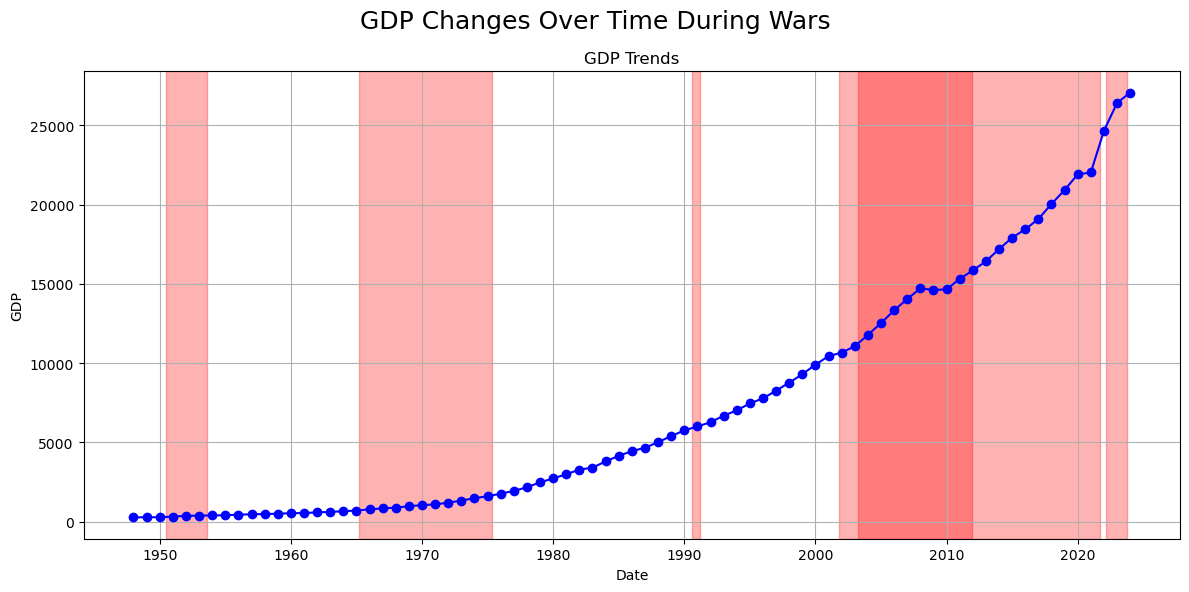

In [356]:
economic_data=load_data()
economic_data_cleaned=clean_data(economic_data)
economic_fator_df = economic_data_cleaned[['Gross Domestic Product']].copy()
plot_trend_economic_factor_war(economic_fator_df)

### Analysis Of GDP For Various War to detect it's trend

In [101]:
economic_data=load_data()
economic_data_cleaned=clean_data(economic_data)
gdp_df = economic_data_cleaned[['Gross Domestic Product']].copy()
gdp_df.head()

,Gross Domestic Product
Quarter,
1947-03-31,243.164
1947-06-30,245.968
1947-09-30,249.585
1947-12-31,259.745
1948-03-31,265.742


In [102]:
def gdp_plot_wars(df):
    war_periods = {
        "Korean War": ("1950-06-25", "1953-07-27"),
        "Vietnam War": ("1965-03-08", "1975-04-30"),
        "Persian Gulf War": ("1990-08-02", "1991-02-28"),
        "War in Afghanistan": ("2001-10-07", "2021-08-30"),
        "Iraq War": ("2003-03-20", "2011-12-18"),
        "Russia Ukraine War": ("2022-02-24", "2023-09-30")
    }
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

    df.reset_index(inplace=True)
    df['Quarter'] = pd.to_datetime(df['Quarter'])
    df.set_index('Quarter', inplace=True)
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
    axes = axes.flatten()
    for ax, (war, (start, end)), color in zip(axes, war_periods.items(), colors):
        war_period_df = df.loc[start:end]
        ax.plot(war_period_df.index, war_period_df['Gross Domestic Product'], marker='o', color=color)
        ax.set_title(f'GDP Changes During {war}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Gross Domestic Product')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

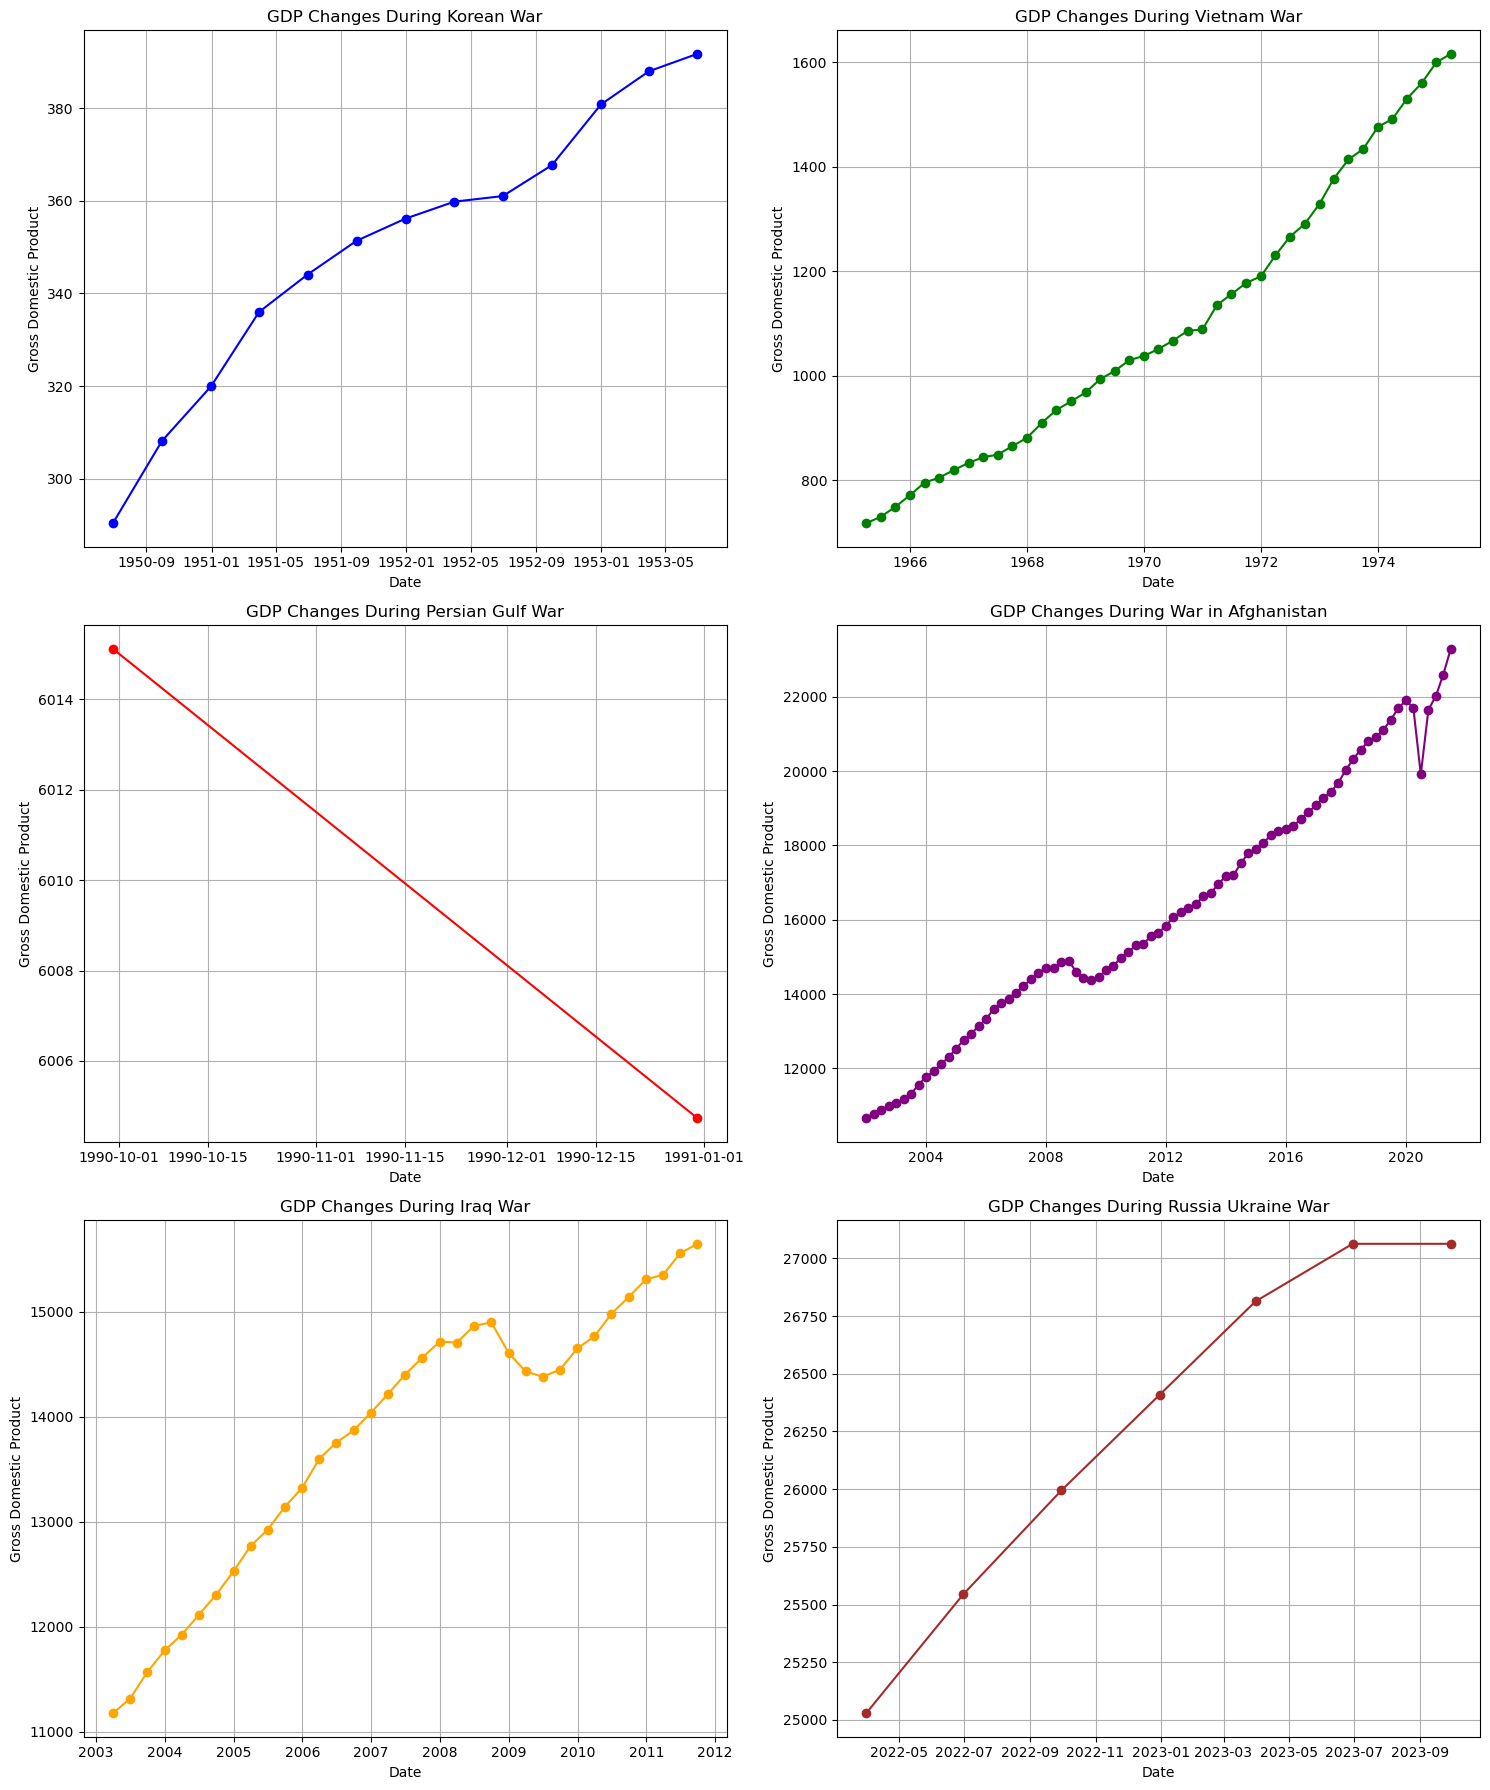

In [103]:
economic_data=load_data()
economic_data_cleaned=clean_data(economic_data)
gdp_df = economic_data_cleaned[['Gross Domestic Product']].copy()
gdp_plot_wars(gdp_df)

### How different factors varies during war

In [271]:
from sklearn.preprocessing import StandardScaler
def plot_trend_factors_war(df):
    war_periods = {
        "Korean War": ("1950-06-25", "1953-07-27"),
        "Vietnam War": ("1965-03-08", "1975-04-30"),
        "Persian Gulf War": ("1990-08-02", "1991-02-28"),
        "War in Afghanistan": ("2001-10-07", "2021-08-30"),
        "Iraq War": ("2003-03-20", "2011-12-18"),
        "Russia Ukraine War": ("2022-02-24", "2023-09-30")  
    }
    df.reset_index(inplace=True)
    df['Quarter'] = pd.to_datetime(df['Quarter'])
    df.rename(columns={'Quarter': 'Date'}, inplace=True)
    df.set_index('Date', inplace=True)
    war_mask = pd.Series(False, index=df.index)
    for start, end in war_periods.values():
        war_mask |= (df.index >= pd.to_datetime(start)) & (df.index <= pd.to_datetime(end))

    war_data = df[war_mask]
    war_data = war_data.resample('Y').ffill()
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(war_data)
    scaled_df = pd.DataFrame(scaled_data, columns=war_data.columns, index=war_data.index)
    
    plt.figure(figsize=(15, 10))
    for column in scaled_df.columns:
        plt.plot(scaled_df.index, scaled_df[column], label=column)

    plt.legend()
    plt.title('Trends of Economic Factors During War Periods (Standardized Scale)')
    plt.xlabel('Year')
    plt.ylabel('Factors Value In Standard Scale')
    
    for war, period in war_periods.items():
        start, end = pd.to_datetime(period[0]), pd.to_datetime(period[1])
        start_year, end_year = start.year, end.year
        if any(scaled_df.index.year == start_year) and any(scaled_df.index.year == end_year):
            start_idx = scaled_df.index.year.tolist().index(start_year)
            end_idx = scaled_df.index.year.tolist().index(end_year)
            plt.axvspan(scaled_df.index[start_idx], scaled_df.index[end_idx], color='red', alpha=0.05)


    plt.show()


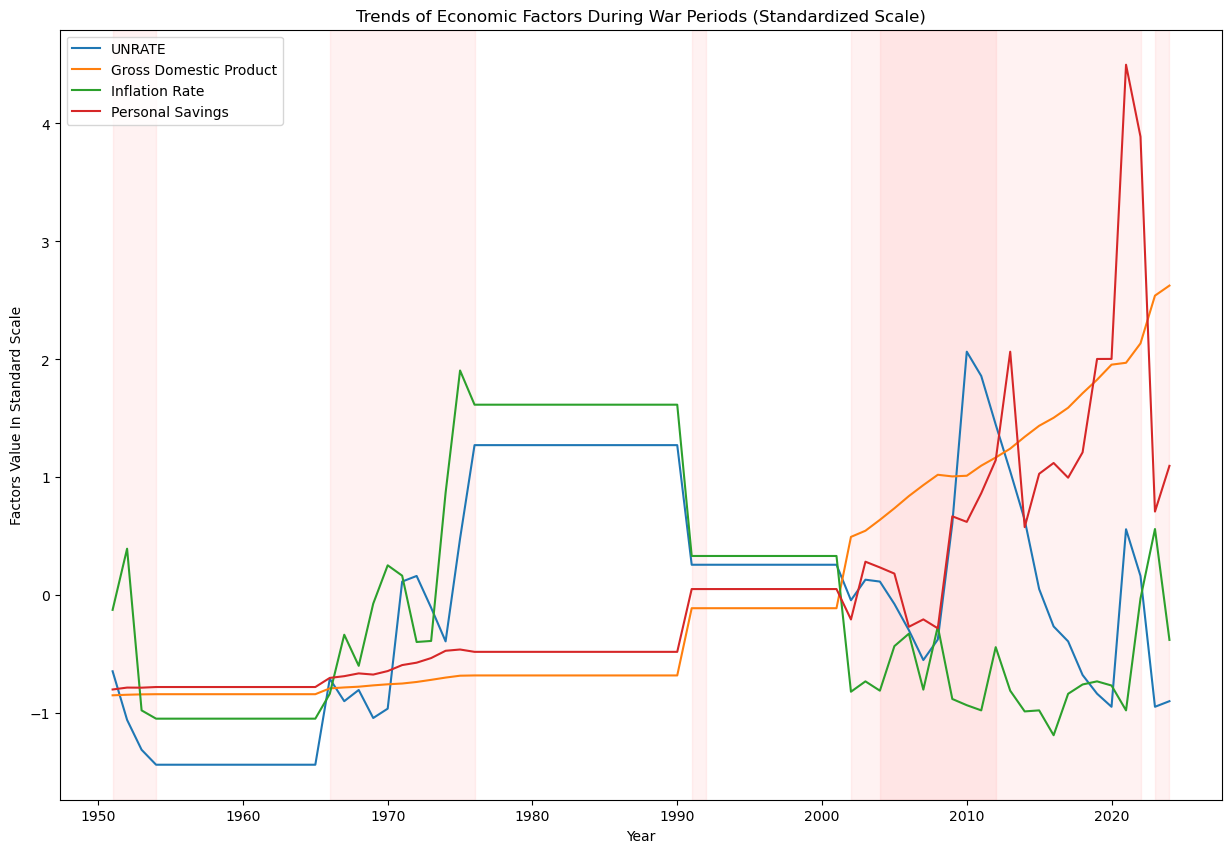

In [272]:
economic_data=load_data()
economic_data_cleaned=clean_data(economic_data)[['UNRATE','Gross Domestic Product','Inflation Rate','Personal Savings']].copy()
plot_trend_factors_war(economic_data_cleaned)

### Bar Plot To show GDP change quarter by quarter For each year during war

In [259]:
def plot_bar(df):
    war_periods = {
        "Korean War": ("1950-06-25", "1953-07-27"),
        "Vietnam War": ("1965-03-08", "1975-04-30"),
        "Persian Gulf War": ("1990-08-02", "1991-02-28"),
        "War in Afghanistan": ("2001-10-07", "2021-08-30"),
        "Iraq War": ("2003-03-20", "2011-12-18"),
        "Russia Ukraine War": ("2022-02-24", "2023-09-30")  
    }
    df.reset_index(inplace=True)
    df['Quarter'] = pd.to_datetime(df['Quarter'])
    df.rename(columns={'Quarter': 'Date'}, inplace=True)
    df.set_index('Date', inplace=True)
    war_gdp = pd.DataFrame()
    war_gdp['pct_change'] = df['Gross Domestic Product'].pct_change() * 100
    war_gdp['year'] = df.index.year
    war_gdp['quarter'] = df.index.quarter
    plot_data = war_gdp.groupby(['year', 'quarter'])['pct_change'].mean().unstack()
    fig, ax = plt.subplots(figsize=(18, 8)) 
    plot_data.plot(kind='bar', stacked=True, colormap='plasma', ax=ax)
    ax.set_title('Quarterly GDP Percentage Change During War Periods')
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage Change')
    plt.xticks(rotation=45, ha='right')
    ax.set_xticks(range(len(plot_data)))
    ax.set_xticklabels(plot_data.index, fontsize=10) 
    quarter_labels = ['Quarter ' + str(q) for q in plot_data.columns]
    ax.legend(quarter_labels, loc='upper right')
    for war, period in war_periods.items():
        start, end = pd.to_datetime(period[0]), pd.to_datetime(period[1])
        start_year, end_year = start.year, end.year
        if start_year in plot_data.index and end_year in plot_data.index:
            start_idx = plot_data.index.tolist().index(start_year)
            end_idx = plot_data.index.tolist().index(end_year) + 1
            ax.axvspan(start_idx, end_idx, color='red', alpha=0.1)

    plt.show()


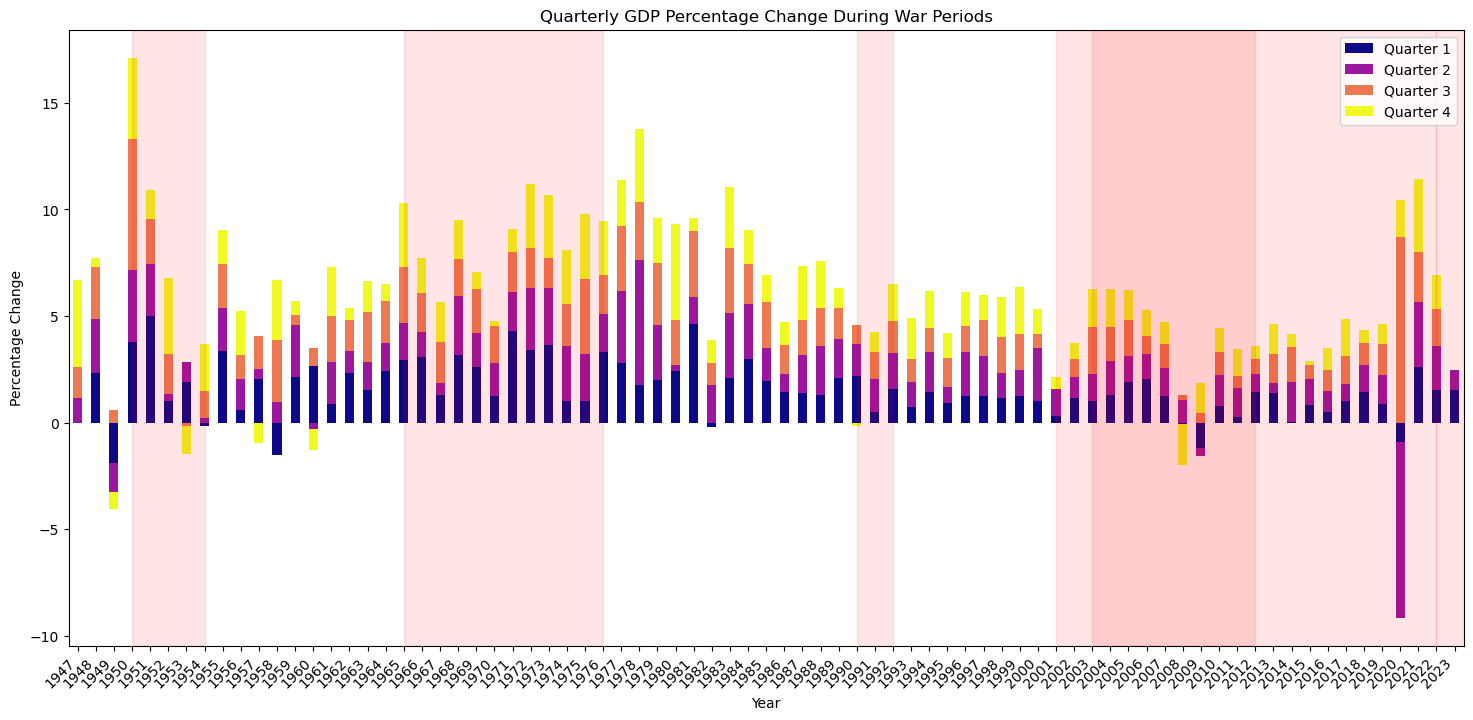

In [260]:
economic_data=load_data()
economic_data_cleaned=clean_data(economic_data)
gdp_df = economic_data_cleaned[['Gross Domestic Product']].copy()
plot_bar(gdp_df)


In [230]:
result_df=load_data()
df=clean_data(result_df)
df.reset_index(inplace=True)
df['Quarter'] = pd.to_datetime(df['Quarter'])
df.rename(columns={'Quarter': 'Date'}, inplace=True)
df.set_index('Date', inplace=True)

war_gdp = pd.DataFrame()
war_gdp['pct_change'] = df['Gross Domestic Product'].pct_change()
war_gdp['year'] = df.index.year
war_gdp['quarter'] = df.index.quarter
plot_data = war_gdp.groupby(['year', 'quarter'])['pct_change'].sum()
plot_data

year  quarter
1947  1          0.000000
      2          0.011531
      3          0.014705
      4          0.040708
1948  1          0.023088
                   ...   
2022  3          0.017631
      4          0.015917
2023  1          0.015343
      2          0.009302
      3          0.000000
Name: pct_change, Length: 307, dtype: float64

In [275]:
def plot_war_no_war_bar(df):
    war_periods = {
        "Korean War": ("1950-06-25", "1953-07-27"),
        "Vietnam War": ("1965-03-08", "1975-04-30"),
        "Persian Gulf War": ("1990-08-02", "1991-02-28"),
        "War in Afghanistan": ("2001-10-07", "2021-08-30"),
        "Iraq War": ("2003-03-20", "2011-12-18"),
        "Russia Ukraine War": ("2022-02-24", "2023-09-30")  
    }
    df.reset_index(inplace=True)
    df['Quarter'] = pd.to_datetime(df['Quarter'])
    df.rename(columns={'Quarter': 'Date'}, inplace=True)
    df.set_index('Date', inplace=True)

    growth_rates = []
    periods = []
    colors = []

    last_date = df.index.min()

    for war, period in war_periods.items():
        start, end = pd.to_datetime(period[0]), pd.to_datetime(period[1])
        
        if last_date < start:
            initial_gdp = df.loc[df.index >= last_date, 'Gross Domestic Product'].iloc[0]
            final_gdp = df.loc[df.index < start, 'Gross Domestic Product'].iloc[-1]
            num_years = (start - last_date).days / 365.25

            if initial_gdp != 0 and num_years != 0:
                growth_rate = (final_gdp / initial_gdp) ** (1 / num_years) - 1
                growth_rates.append(growth_rate * 100)  
                periods.append(f"{last_date.year}-{start.year} (Non-War)")
                colors.append('green')

        initial_gdp = df.loc[df.index < start, 'Gross Domestic Product'].iloc[-1]
        final_gdp = df.loc[df.index <= end, 'Gross Domestic Product'].iloc[-1]
        num_years = (end - start).days / 365.25

        if initial_gdp != 0 and num_years != 0:
            growth_rate = (final_gdp / initial_gdp) ** (1 / num_years) - 1
            growth_rates.append(growth_rate * 100)  
            periods.append(f"{war}")
            colors.append('red')

        last_date = end 

 
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(periods, growth_rates, color=colors)
    ax.set_title('Average Annual GDP Growth Rates During War and Non-War Periods')
    ax.set_ylabel('Growth Rate (%)')
    ax.set_xlabel('Periods')
    plt.xticks(rotation=45)
    plt.show()



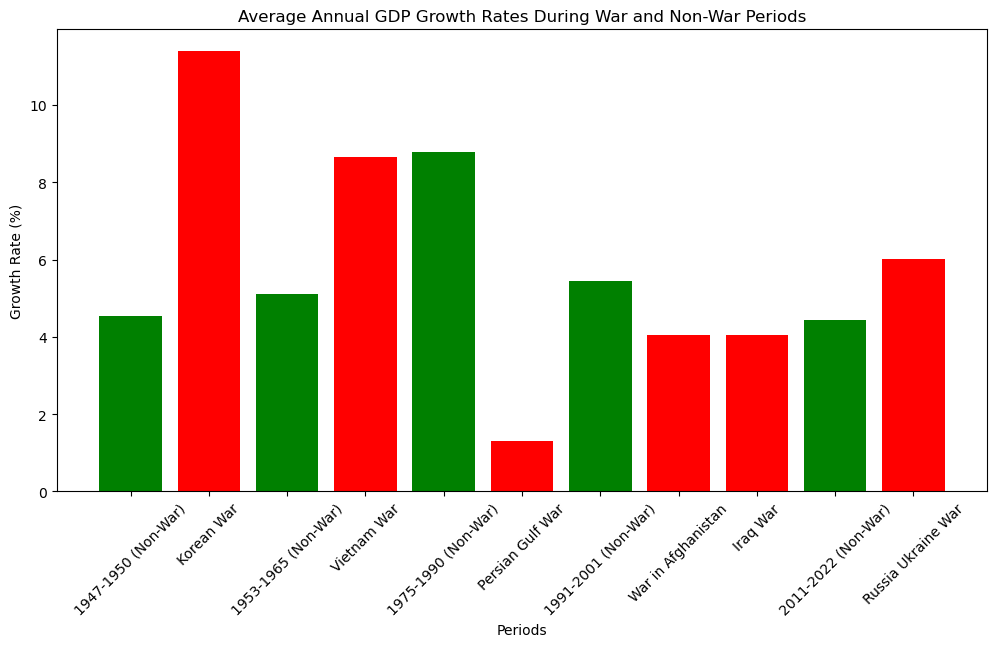

In [276]:
economic_data=load_data()
economic_data_cleaned=clean_data(economic_data)
annualized_gdp_df = economic_data_cleaned[['Gross Domestic Product']].copy()
plot_war_no_war_bar(annualized_gdp_df)